In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To show all the columns
pd.pandas.set_option('display.max_column',None)

In [11]:
df = pd.read_csv('car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
for feature in df.columns:
    print(feature,len(df[feature].unique()))

Car_Name 98
Year 16
Selling_Price 156
Present_Price 147
Kms_Driven 206
Fuel_Type 3
Seller_Type 2
Transmission 2
Owner 3


In [8]:
df.shape

(301, 9)

In [12]:
df['Year']=2020-df['Year']


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


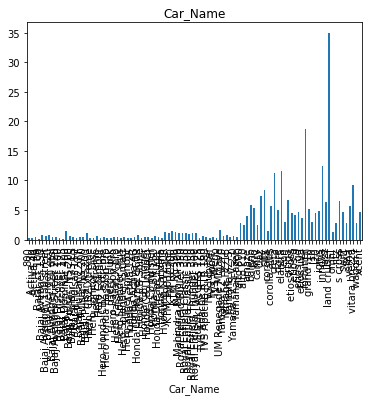

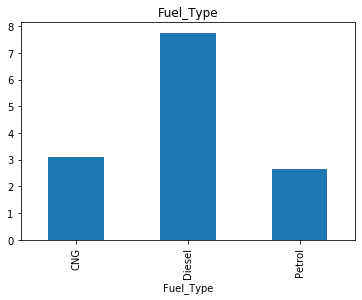

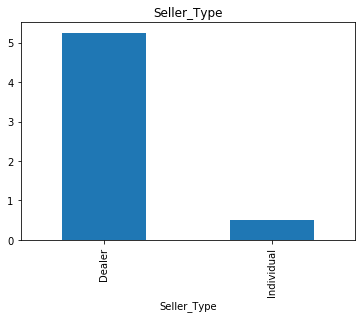

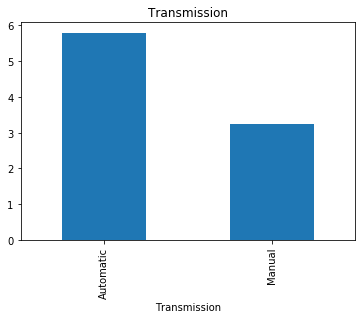

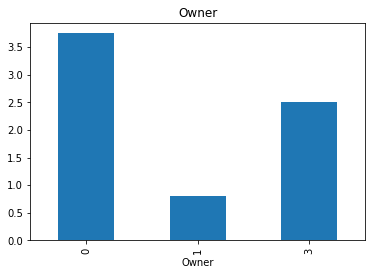

In [23]:
# relationship between dicrete features and SalePrice
for feature in ['Car_Name','Fuel_Type','Seller_Type','Transmission','Owner']:
    data = df.copy()
    data.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

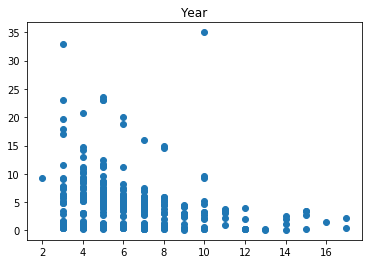

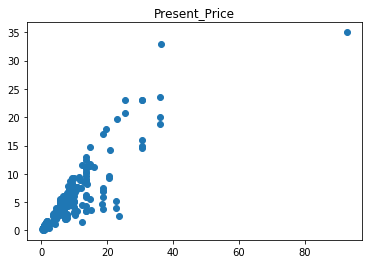

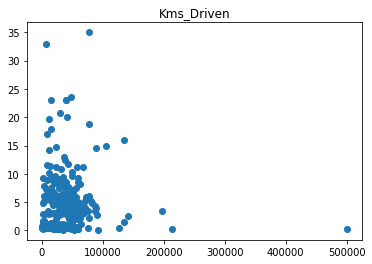

In [22]:
# relationship between dicrete features and SalePrice
for feature in ['Year', 'Present_Price', 'Kms_Driven' ]:
    data = df.copy()
    plt.scatter(df[feature],df['Selling_Price'])
    plt.title(feature)
    plt.show()

In [ ]:
df.drop()

In [27]:
final_dataset = pd.get_dummies(df.drop(['Car_Name'],axis=1),drop_first=True)

In [34]:
final_dataset=final_dataset[['Year',  'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual','Selling_Price']]

In [36]:
#independent and dependant features
x=final_dataset.iloc[:,:-1]
y=final_dataset.iloc[:,-1]

[0.07667534 0.3556483  0.04003071 0.00132781 0.23869018 0.00960748
 0.12783258 0.1501876 ]


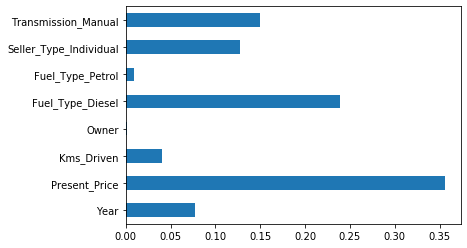

In [40]:
### feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index = x.columns)
feat_importances.plot(kind='barh')
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [48]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


xgb_model=xgb.XGBRegressor()
Grid_search = GridSearchCV(xgb_model,
                   {'max_depth': [ 6,8,10],
                    'n_estimators': [70,80,90,100,110,120]}, verbose=1)

# Fitting the model
Grid_search.fit(X_train,y_train)

print(Grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 8, 'n_estimators': 90}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.2s finished


In [49]:
model=xgb.XGBRegressor(max_depth=8,n_estimators=90)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

MSE: 0.5459741857403614


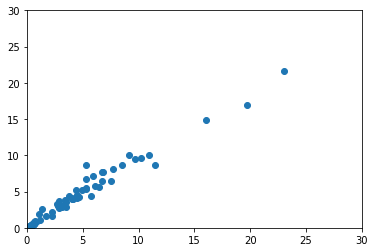

In [52]:
prediction=model.predict(X_test)

plt.scatter(y_test,prediction)
axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])

from sklearn import metrics
print('MSE:', metrics.mean_absolute_error(y_test, prediction))